In [1]:
import pandas as pd
from rdflib import Graph
from rdflib.plugins.sparql.processor import SPARQLResult

In [2]:
def sparql_results_to_df(results: SPARQLResult) -> pd.DataFrame:
    """
    Export results from an rdflib SPARQL query into a `pandas.DataFrame`,
    using Python types. See https://github.com/RDFLib/rdflib/issues/1179.
    """
    return pd.DataFrame(
        data=([None if x is None else x.toPython() for x in row] for row in results),
        columns=[str(x) for x in results.vars],
    )

In [3]:
g = Graph()
g.parse("dataset/graph/ddidpi.nt", format="ttl")

<Graph identifier=N0d55bebad0974b47af2a1a27c6bcaf9b (<class 'rdflib.graph.Graph'>)>

In [4]:
query = """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ddidpi: <http://www.project-ddidpi.de/vocab/>
    
select distinct ?precipitant ?precipitant_dbpedia ?object ?object_dbpedia ?effect ?impact
                ?protein ?category ?action ?gene ?organism ?pubmed
where {
    ?ddi ddidpi:hasPrecipitantDrug ?precipitant .
    ?precipitant ddidpi:hasDBpediaResource ?precipitant_dbpedia .
    ?ddi ddidpi:hasObjectDrug ?object .
    ?object ddidpi:hasDBpediaResource ?object_dbpedia .    
    ?ddi ddidpi:hasEffect ?effect .
    ?ddi ddidpi:hasImpact ?impact .
    
    ?dpi ddidpi:hasDrugIDforInteraction ?object .
    ?dpi ddidpi:hasProteinIDforInteraction ?protein .
    ?dpi ddidpi:hasCategory ?category .
    ?dpi ddidpi:hasActions ?action .
    ?dpi ddidpi:hasEntrez_gene_id ?gene .
    ?dpi ddidpi:hasOrganism ?organism .
    ?dpi ddidpi:hasPubMedID ?pubmed .
    
    } LIMIT 5
    """

qres = g.query(query)
df1 = sparql_results_to_df(qres)
df1
# results = g.query(query)

,precipitant,precipitant_dbpedia,object,object_dbpedia,effect,impact,protein,category,action,gene,organism,pubmed
0,http://www.project-ddidpi.de/Drug/DB00327,http://dbpedia.org/resource/Hydromorphone,http://www.project-ddidpi.de/Drug/DB00331,http://dbpedia.org/resource/Metformin,excretion,decrease,http://www.project-ddidpi.de/Protein/O15244,transporter,substrate|inhibitor,http://purl.uniprot.org/geneid/6582,Human,http://purl.uniprot.org/pubmed/16272756
1,http://www.project-ddidpi.de/Drug/DB00619,http://dbpedia.org/resource/Imatinib,http://www.project-ddidpi.de/Drug/DB00331,http://dbpedia.org/resource/Metformin,serum_concentration,increase,http://www.project-ddidpi.de/Protein/O15244,transporter,substrate|inhibitor,http://purl.uniprot.org/geneid/6582,Human,http://purl.uniprot.org/pubmed/16272756
2,http://www.project-ddidpi.de/Drug/DB01333,http://dbpedia.org/resource/Cefradine,http://www.project-ddidpi.de/Drug/DB00331,http://dbpedia.org/resource/Metformin,serum_concentration,increase,http://www.project-ddidpi.de/Protein/O15244,transporter,substrate|inhibitor,http://purl.uniprot.org/geneid/6582,Human,http://purl.uniprot.org/pubmed/16272756
3,http://www.project-ddidpi.de/Drug/DB09285,http://dbpedia.org/resource/Morniflumate,http://www.project-ddidpi.de/Drug/DB00331,http://dbpedia.org/resource/Metformin,serum_concentration,increase,http://www.project-ddidpi.de/Protein/O15244,transporter,substrate|inhibitor,http://purl.uniprot.org/geneid/6582,Human,http://purl.uniprot.org/pubmed/16272756
4,http://www.project-ddidpi.de/Drug/DB06737,http://dbpedia.org/resource/Zaltoprofen,http://www.project-ddidpi.de/Drug/DB00331,http://dbpedia.org/resource/Metformin,excretion,decrease,http://www.project-ddidpi.de/Protein/O15244,transporter,substrate|inhibitor,http://purl.uniprot.org/geneid/6582,Human,http://purl.uniprot.org/pubmed/16272756


In [29]:
query = """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ddidpi: <http://www.project-ddidpi.de/vocab/>
    
select distinct ?s ?o
where {
    ?s a ddidpi:Drug .
    ?o a ddidpi:Protein .
    ?s ddidpi:interactsWith ?o .
    }
    """

qres = g.query(query)
df = sparql_results_to_df(qres)
df

,s,o
0,http://www.project-ddidpi.de/Drug/DB04893,http://www.project-ddidpi.de/Protein/P49356
1,http://www.project-ddidpi.de/Drug/DB07227,http://www.project-ddidpi.de/Protein/P49356
2,http://www.project-ddidpi.de/Drug/DB08676,http://www.project-ddidpi.de/Protein/P49356
3,http://www.project-ddidpi.de/Drug/DB06953,http://www.project-ddidpi.de/Protein/P49356
4,http://www.project-ddidpi.de/Drug/DB07780,http://www.project-ddidpi.de/Protein/P49356
...,...,...
18043,http://www.project-ddidpi.de/Drug/DB00086,http://www.project-ddidpi.de/Protein/P25116
18044,http://www.project-ddidpi.de/Drug/DB05361,http://www.project-ddidpi.de/Protein/P25116
18045,http://www.project-ddidpi.de/Drug/DB01349,http://www.project-ddidpi.de/Protein/P50052
18046,http://www.project-ddidpi.de/Drug/DB05739,http://www.project-ddidpi.de/Protein/P50052


In [55]:
df = df.sample(frac = 1)

In [56]:
cut_off = int((df.shape[0]*70)/100)
train = df[:cut_off].copy()
test = df[cut_off:].copy()

test['s'] = '<' + test['s'].astype(str) + '>'
test['o'] = '<' + test['o'].astype(str) + '>'
test['p'] = "<http://www.project-ddidpi.de/vocab/interactsWith>"
test = test[['s', 'p', 'o']]

train['s'] = '<' + train['s'].astype(str) + '>'
train['o'] = '<' + train['o'].astype(str) + '>'
train['p'] = "<http://www.project-ddidpi.de/vocab/interactsWith>"
train = train[['s', 'p', 'o']]
display(train.shape, train.head(1), test.shape, test.head(1))

(12633, 3)

,s,p,o
9039,<http://www.project-ddidpi.de/Drug/DB00450>,<http://www.project-ddidpi.de/vocab/interactsW...,<http://www.project-ddidpi.de/Protein/P35348>


(5415, 3)

,s,p,o
4059,<http://www.project-ddidpi.de/Drug/DB01295>,<http://www.project-ddidpi.de/vocab/interactsW...,<http://www.project-ddidpi.de/Protein/P08588>


In [57]:
path = 'dataset/graph/'
kg = pd.read_csv(path + 'ddidpi.nt', sep=' ', header=None)
kg.columns = ['s', 'p', 'o']
kg.replace('>.', '>', regex=True, inplace=True)
display(kg.shape, kg.head(2))

(4567885, 3)

,s,p,o
0,<http://www.project-ddidpi.de/DPI/DB00001-P00734>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.project-ddidpi.de/vocab/DPI>
1,<http://www.project-ddidpi.de/DPI/DB00001-P00734>,<http://www.project-ddidpi.de/vocab/hasPubMedID>,<http://purl.uniprot.org/pubmed/10505536>


In [58]:
train_set = kg.merge(test, how = 'outer' , on=['s', 'p', 'o'], indicator=True).loc[lambda x : x['_merge']=='left_only']
display(train_set.shape, train_set.head(2))

(4562470, 4)

,s,p,o,_merge
0,<http://www.project-ddidpi.de/DPI/DB00001-P00734>,<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>,<http://www.project-ddidpi.de/vocab/DPI>,left_only
1,<http://www.project-ddidpi.de/DPI/DB00001-P00734>,<http://www.project-ddidpi.de/vocab/hasPubMedID>,<http://purl.uniprot.org/pubmed/10505536>,left_only


In [59]:
train_set = train_set.drop(columns='_merge')
train_set.to_csv('Embedding/V1/train_set.ttl', columns=None, index=None, sep='\t')

In [60]:
test.to_csv('Embedding/V1/test_set.ttl', columns=None, index=None, sep='\t')

In [7]:
def get_triples_DPI(drug, protein):
    query = """PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX ddidpi: <http://www.project-ddidpi.de/vocab/>

select distinct ?dpi ?p ?o
where {
    ?dpi a ddidpi:DPI .

    ?dpi ddidpi:hasDrugIDforInteraction <""" + drug +"""> .
    ?dpi ddidpi:hasProteinIDforInteraction <""" + protein +"""> .
    ?dpi ?p ?o .
    }
    """

    qres = g.query(query)
    return sparql_results_to_df(qres)

In [9]:
dataset = pd.DataFrame()
for i, row in test.iterrows():
    d = row['drug']
    p = row['protein']
    
    to_add = get_triples_DPI(d, p)
    dataset = pd.concat([dataset, to_add])
    
display(dataset.shape, dataset.head(2))

(51897, 3)

,dpi,p,o
0,http://www.project-ddidpi.de/DPI/DB03881-P00491,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.project-ddidpi.de/vocab/DPI
1,http://www.project-ddidpi.de/DPI/DB03881-P00491,http://www.project-ddidpi.de/vocab/hasEntrez_g...,http://purl.uniprot.org/geneid/4860


In [6]:
for i, row in df1.iteritems():
    print(row.values)

['http://www.project-ddidpi.de/vocab/hasObjectDrug'
 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type'
 'http://www.project-ddidpi.de/vocab/hasPrecipitantDrug'
 'http://www.project-ddidpi.de/vocab/hasEffect'
 'http://www.project-ddidpi.de/vocab/hasInteractionDescription'
 'http://www.project-ddidpi.de/vocab/hasImpact'
 'http://www.project-ddidpi.de/vocab/hasDrugIDforInteraction'
 'http://www.project-ddidpi.de/vocab/hasPubMedID'
 'http://www.project-ddidpi.de/vocab/hasKnownAction'
 'http://www.project-ddidpi.de/vocab/hasCategory'
 'http://www.project-ddidpi.de/vocab/hasEntrez_gene_id'
 'http://www.project-ddidpi.de/vocab/interactsWith'
 'http://www.project-ddidpi.de/vocab/hasOrganism'
 'http://www.project-ddidpi.de/vocab/hasActions'
 'http://www.project-ddidpi.de/vocab/hasProteinIDforInteraction'
 'http://www.project-ddidpi.de/vocab/hasDrugID'
 'http://www.project-ddidpi.de/vocab/hasDBpediaResource'
 'http://www.project-ddidpi.de/vocab/hasProteinID'
 'http://www.project-ddidpi.de/vocab/

In [44]:
def save_graph(path, line, name):
    with open(path + name, 'a') as file:
        file.write(line)


def preprocess_v1(lines):
    for line in lines:
        s = line.split(' ')[0]
        p = line.split(' ')[1]
        o = '_'.join(line.split(' ')[2:])
        save_graph('V1/', s + '\t' + p + '\t' + o)


def preprocess_v2(path, lines, name):
    for line in lines:
#         a = line.replace('>.', '>')
        a = line.replace('<http://www.project-ddidpi.de/DPI/', '')
        a = a.replace('<http://purl.uniprot.org/pubmed/', 'pubmed:')
        a = a.replace('<http://www.project-ddidpi.de/vocab/DPI>', 'DPI')
        a = a.replace('<http://www.project-ddidpi.de/vocab/', '')
        a = a.replace('<http://www.w3.org/1999/02/22-rdf-syntax-ns#', '')
        a = a.replace('<http://www.project-ddidpi.de/DDI/', '')
        a = a.replace('^^<http://www.w3.org/2001/XMLSchema#string', '')
        a = a.replace('<http://www.project-ddidpi.de/Drug/', 'Drug:') 

        a = a.replace('<http://purl.uniprot.org/uniprot/', 'uniprot:') 
        a = a.replace('<http://dbpedia.org/resource/', '') 
        a = a.replace('<http://www.project-ddidpi.de/Annotation/', '') 
        a = a.replace('<http://www.project-ddidpi.de/Protein/', 'Protein:') 
        a = a.replace('<http://purl.uniprot.org/geneid/', 'gene:') 

        a = a.replace('>', '')
#         preprocess_v1([a])
        save_graph(path, a, name)

In [61]:
path = 'Embedding/V1/'
with open(path + "train_set.ttl") as f:
    lines = f.readlines()
preprocess_v2(path, lines, 'train_set_v1.ttl')

with open(path + "test_set.ttl") as f:
    lines = f.readlines()
preprocess_v2(path, lines, 'test_set_v1.ttl')

In [62]:
kg = pd.read_csv(path + 'test_set_v1.ttl', sep='\t', header=None)
kg.columns = ['s', 'p', 'o']
kg

,s,p,o
0,Drug:DB01295,interactsWith,Protein:P08588
1,Drug:DB00157,interactsWith,Protein:Q9UDR5
2,Drug:DB01694,interactsWith,Protein:Q9NP99
3,Drug:DB01026,interactsWith,Protein:P24462
4,Drug:DB02373,interactsWith,Protein:P49789
...,...,...,...
5410,Drug:DB04889,interactsWith,Protein:P14416
5411,Drug:DB02507,interactsWith,Protein:P11712
5412,Drug:DB04444,interactsWith,Protein:O14983
5413,Drug:DB01809,interactsWith,Protein:P07949


<AxesSubplot:>

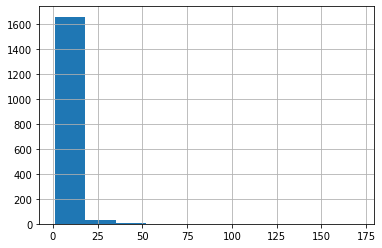

In [72]:
kg.o.value_counts().hist()

In [73]:
len(kg.o.unique())

1703

In [74]:
len(kg.s.unique())

2761